In [3]:
import requests

In [4]:
import pandas as pd

### 크롤링 전략
1. 서울시 위치정보 (좌표계_ ITRF2000) 에서 서울시 좌표 경계 구함
2. 서울시 경계 안의 건물 전체 좌표 크롤링
3. 서울시 건물 전체 좌표를 활용해 건물별 점포이력 크롤링

#### 1. 서울시 위치정보로 경계 확인

In [5]:
coord_df = pd.read_csv('./서울시건물위치정보(좌표만).csv')
coord_df

,X 좌표,Y 좌표
0,198949.549,452545.153
1,198957.579,452630.151
2,198944.025,452539.206
3,198963.667,452639.482
4,198956.256,452635.765
...,...,...
659182,192202.026,445806.340
659183,192143.416,445883.503
659184,192202.236,445852.646
659185,190961.173,448640.485


In [6]:
print('X좌표 최소:', coord_df['X 좌표'].min(),'X좌표 최대:',coord_df['X 좌표'].max())
print('Y좌표 최소:', coord_df['Y 좌표'].min(),'Y좌표 최대:', coord_df['Y 좌표'].max())

X좌표 최소: 179510.48100000003 X좌표 최대: 216179.044
Y좌표 최소: 436789.37100000004 Y좌표 최대: 466375.407


#### 2. 서울전체에서 건물좌표 크롤링 (우리 마을가게)

In [5]:
# 서울 전체
minx = 179510.48100000003
miny = 436789.37100000004
maxx = 216179.044
maxy = 466375.407
url = "https://golmok.seoul.go.kr/tool/wfs/store.json?minx={}&miny={}&maxx={}&maxy={}&wkt=&sep=all&etc=&gbn=cdm&ext=ext".format(minx,miny,maxx,maxy)
params = {
        "Cookie": "WL_PCID=16045921738236557248609; PCID=16676960166058016536680; RC_RESOLUTION=1792*1120; RC_COLOR=30; _ga=GA1.3.884082512.1604624017; _gid=GA1.3.1665470372.1608664115; MEM001_NM2=; memUserId=cow1021; MEM_NM2=%EC%86%8C%EB%B3%91%EC%B2%A0; MEM_DIV=; WL_PCID_DATA=%7B%22pcid%22%3A%2216045921738236557248609%22%2C%22recom_list%22%3A%5B%7B%22SERVICE_NAME%22%3A%22%EB%B2%95%EB%AC%B4%ED%96%89%EC%A0%95(%EC%9E%90%EC%B9%98%EB%B2%95%EA%B7%9C)%22%2C%22SERVICE_URL%22%3A%22http%3A%2F%2Flegal.seoul.go.kr%2F%22%2C%22REG_DATE%22%3A1607495359000%2C%22RECOM_IDX%22%3A301%2C%22RANK%22%3A1%2C%22FLAG%22%3A1%7D%2C%7B%22SERVICE_NAME%22%3A%22%EC%A7%80%EB%B0%A9%EC%84%B8%EB%82%A9%EB%B6%80%22%2C%22SERVICE_URL%22%3A%22https%3A%2F%2Fetax.seoul.go.kr%22%2C%22REG_DATE%22%3A1594859192000%2C%22RECOM_IDX%22%3A241%2C%22RANK%22%3A2%2C%22FLAG%22%3A1%7D%2C%7B%22SERVICE_NAME%22%3A%22%EC%84%9C%EC%9A%B8%EA%B4%80%EA%B4%91%22%2C%22SERVICE_URL%22%3A%22https%3A%2F%2Fkorean.visitseoul.net%22%2C%22REG_DATE%22%3A1607495410000%2C%22RECOM_IDX%22%3A302%2C%22RANK%22%3A3%2C%22FLAG%22%3A1%7D%2C%7B%22SERVICE_NAME%22%3A%22%EC%97%B4%EB%A6%B0%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B4%91%EC%9E%A5%22%2C%22SERVICE_URL%22%3A%22https%3A%2F%2Fdata.seoul.go.kr%22%2C%22REG_DATE%22%3A1608649200000%2C%22RECOM_IDX%22%3A0%2C%22RANK%22%3A1%2C%22PCID%22%3A%2216045921738236557248609%22%2C%22FLAG%22%3A2%7D%2C%7B%22SERVICE_NAME%22%3A%22%EC%9A%B0%EB%A6%AC%EB%A7%88%EC%9D%84%EA%B0%80%EA%B2%8C%EC%83%81%EA%B6%8C%EB%B6%84%EC%84%9D%EC%84%9C%EB%B9%84%EC%8A%A4%22%2C%22SERVICE_URL%22%3A%22https%3A%2F%2Fgolmok.seoul.go.kr%22%2C%22REG_DATE%22%3A1608649200000%2C%22RECOM_IDX%22%3A0%2C%22RANK%22%3A2%2C%22PCID%22%3A%2216045921738236557248609%22%2C%22FLAG%22%3A2%7D%2C%7B%22SERVICE_NAME%22%3A%22%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%BA%A0%ED%8D%BC%EC%8A%A4%22%2C%22SERVICE_URL%22%3A%22https%3A%2F%2Fbigdata.seoul.go.kr%22%2C%22REG_DATE%22%3A1608649200000%2C%22RECOM_IDX%22%3A0%2C%22RANK%22%3A3%2C%22PCID%22%3A%2216045921738236557248609%22%2C%22FLAG%22%3A2%7D%2C%7B%22SERVICE_NAME%22%3A%22%ED%92%88%EC%A7%88%EC%8B%9C%ED%97%98%EC%86%8C%22%2C%22SERVICE_URL%22%3A%22https%3A%2F%2Fnews.seoul.go.kr%2Fcitybuild%2Farchives%2Fcategory%2Ftechnical-news_c1%2Fquality_technical%22%2C%22REG_DATE%22%3A1608649200000%2C%22RECOM_IDX%22%3A0%2C%22RANK%22%3A6%2C%22PCID%22%3A%2216045921738236557248609%22%2C%22FLAG%22%3A2%7D%2C%7B%22SERVICE_NAME%22%3A%22%EC%83%81%EC%88%98%EB%8F%84%EC%82%AC%EC%97%85%EB%B3%B8%EB%B6%80%22%2C%22SERVICE_URL%22%3A%22https%3A%2F%2Farisu.seoul.go.kr%22%2C%22REG_DATE%22%3A1608649200000%2C%22RECOM_IDX%22%3A0%2C%22RANK%22%3A7%2C%22PCID%22%3A%2216045921738236557248609%22%2C%22FLAG%22%3A2%7D%2C%7B%22SERVICE_NAME%22%3A%22%EB%82%B4%EC%86%90%EC%95%88%EC%97%90%EC%84%9C%EC%9A%B8%22%2C%22SERVICE_URL%22%3A%22https%3A%2F%2Fmediahub.seoul.go.kr%22%2C%22REG_DATE%22%3A1608649200000%2C%22RECOM_IDX%22%3A0%2C%22RANK%22%3A8%2C%22PCID%22%3A%2216045921738236557248609%22%2C%22FLAG%22%3A2%7D%2C%7B%22SERVICE_NAME%22%3A%22%ED%8F%89%EC%83%9D%ED%95%99%EC%8A%B5%ED%8F%AC%ED%84%B8%22%2C%22SERVICE_URL%22%3A%22https%3A%2F%2Fsll.seoul.go.kr%22%2C%22REG_DATE%22%3A1608649200000%2C%22RECOM_IDX%22%3A0%2C%22RANK%22%3A1%2C%22PCID%22%3A%2216045921738236557248609%22%2C%22FLAG%22%3A3%7D%5D%7D; temp_addr=; MEM001_PK=; MEM001_ID=; MEM001_NM=; MEM_NM=; REALNAME_YN=; PWD_CHANGE_YN=; PAUSE_YN=; MEM_ID=; USER_NM=; USER_NAME=; MAYOR_ID=; SEOUL_EMAIL_DELYN=; PW_CHECK_YN=; JSESSIONID=7CDb0BddRJUIm1GwCDAnOua4DYz0gPq17m0zY2WLkvEtXN2SV69uvSFZz3994AXk.amV1c19kb21haW4vbWVtYmVyMTA2; sessionid=ba3XsFsW3HaoVmtxC8RpqPFCoL8Lnv2H77MSrP3TaaEkhBFIV7Xwy1PXKNrXT0Yj.amV1c19kb21haW4vZ29sbW9rMg=="
        }
response = requests.post(url, headers=params)
data = response.json()
df = pd.DataFrame(data)
df
# dfs.append(df)

# dfs = pd.concat(dfs)
# dfs

,sid,cnt,label,coordx,coordy
0,1005939639,126,126개의 이력,181274,451391
1,1005434907,5,5개의 이력,182076,449674
2,1004068654,1,1개의 이력,182348,453414
3,1005395789,2,2개의 이력,182675,452644
4,1005465739,21,21개의 이력,182898,452610
...,...,...,...,...,...
253748,1003954754,4,4개의 이력,215709,449733
253749,1003935045,1,1개의 이력,215742,452131
253750,1004790474,4,4개의 이력,215785,452021
253751,1004750604,1,1개의 이력,215921,451192


In [6]:
df.to_csv('점포이력건물좌표.csv')
pd.read_csv('점포이력건물좌표.csv')

,Unnamed: 0,sid,cnt,label,coordx,coordy
0,0,1005939639,126,126개의 이력,181274,451391
1,1,1005434907,5,5개의 이력,182076,449674
2,2,1004068654,1,1개의 이력,182348,453414
3,3,1005395789,2,2개의 이력,182675,452644
4,4,1005465739,21,21개의 이력,182898,452610
...,...,...,...,...,...,...
253748,253748,1003954754,4,4개의 이력,215709,449733
253749,253749,1003935045,1,1개의 이력,215742,452131
253750,253750,1004790474,4,4개의 이력,215785,452021
253751,253751,1004750604,1,1개의 이력,215921,451192


##### 서울시 건물갯수 253753개 확인
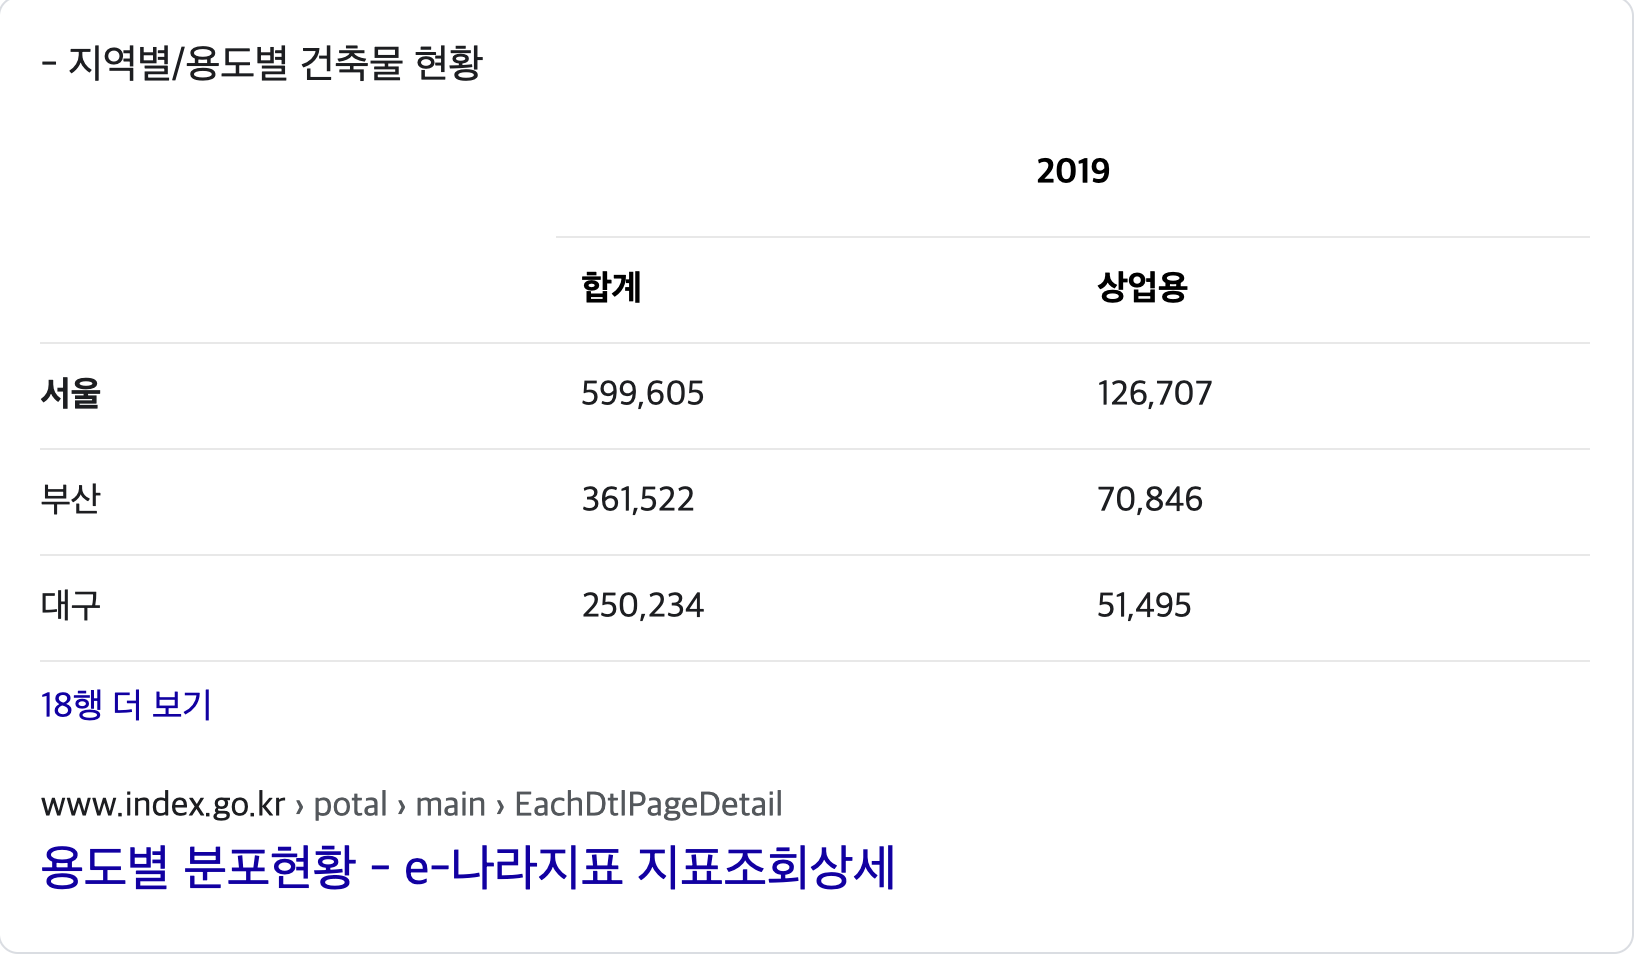

In [17]:
# 크롤링 예상시간 계산 (time.sleep 1초 설정시)
print(253753/ 5 / 60 / 60 , '시간')
print(253753/ 5, '1회 크롤링 파일갯수')

14.09738888888889 시간
50750.6 1회 크롤링 파일갯수


In [189]:
# 건물 좌표만 df 로 변경
df = df[['coordx','coordy']]
df

,coordx,coordy
0,181274,451391
1,182076,449674
2,182348,453414
3,182675,452644
4,182898,452610
...,...,...
253748,215709,449733
253749,215742,452131
253750,215785,452021
253751,215921,451192


In [190]:
# 건물 좌료를 lis 리스트로 만듬
lis = []
for i in range(len(df)):
    x = df.iloc[i]
    lis.append(x)
lis

[coordx    181274
 coordy    451391
 Name: 0, dtype: int64,
 coordx    182076
 coordy    449674
 Name: 1, dtype: int64,
 coordx    182348
 coordy    453414
 Name: 2, dtype: int64,
 coordx    182675
 coordy    452644
 Name: 3, dtype: int64,
 coordx    182898
 coordy    452610
 Name: 4, dtype: int64,
 coordx    182924
 coordy    452645
 Name: 5, dtype: int64,
 coordx    182956
 coordy    452635
 Name: 6, dtype: int64,
 coordx    183007
 coordy    452002
 Name: 7, dtype: int64,
 coordx    183029
 coordy    451680
 Name: 8, dtype: int64,
 coordx    183032
 coordy    452034
 Name: 9, dtype: int64,
 coordx    183060
 coordy    451606
 Name: 10, dtype: int64,
 coordx    183063
 coordy    451685
 Name: 11, dtype: int64,
 coordx    183077
 coordy    452375
 Name: 12, dtype: int64,
 coordx    183092
 coordy    451416
 Name: 13, dtype: int64,
 coordx    183154
 coordy    451879
 Name: 14, dtype: int64,
 coordx    183155
 coordy    451503
 Name: 15, dtype: int64,
 coordx    183169
 coordy    45151

In [191]:
lis[0]['coordx'], lis[0]['coordy']

(181274, 451391)

In [199]:
import time
import random

#### 3. 253,753 개 건물좌표로 건물별 점포이력 크롤링

In [239]:
dfs = []
#for i in range(10000):
#for i in range(10000,20000):
#for i in range(20000,70000):
#for i in range(70000,100000):
#for i in range(100000,150000):
#for i in range(150000,200000):
#for i in range(200000,250000):
for i in range(250000,253753):
    x = lis[i]['coordx']
    y = lis[i]['coordy']
    url = 'https://golmok.seoul.go.kr/tool/wfs/storeHist.json?coordx={}&coordy={}&sep=all&gbn=cdm&etc=&pagesize=100'.format(x,y)
    params = {
            "Cookie": "WL_PCID=16045921738236557248609; PCID=16676960166058016536680; RC_RESOLUTION=1792*1120; RC_COLOR=30; _ga=GA1.3.884082512.1604624017; _gid=GA1.3.1665470372.1608664115; MEM001_NM2=; memUserId=cow1021; MEM_NM2=%EC%86%8C%EB%B3%91%EC%B2%A0; MEM_DIV=; WL_PCID_DATA=%7B%22pcid%22%3A%2216045921738236557248609%22%2C%22recom_list%22%3A%5B%7B%22SERVICE_NAME%22%3A%22%EB%B2%95%EB%AC%B4%ED%96%89%EC%A0%95(%EC%9E%90%EC%B9%98%EB%B2%95%EA%B7%9C)%22%2C%22SERVICE_URL%22%3A%22http%3A%2F%2Flegal.seoul.go.kr%2F%22%2C%22REG_DATE%22%3A1607495359000%2C%22RECOM_IDX%22%3A301%2C%22RANK%22%3A1%2C%22FLAG%22%3A1%7D%2C%7B%22SERVICE_NAME%22%3A%22%EC%A7%80%EB%B0%A9%EC%84%B8%EB%82%A9%EB%B6%80%22%2C%22SERVICE_URL%22%3A%22https%3A%2F%2Fetax.seoul.go.kr%22%2C%22REG_DATE%22%3A1594859192000%2C%22RECOM_IDX%22%3A241%2C%22RANK%22%3A2%2C%22FLAG%22%3A1%7D%2C%7B%22SERVICE_NAME%22%3A%22%EC%84%9C%EC%9A%B8%EA%B4%80%EA%B4%91%22%2C%22SERVICE_URL%22%3A%22https%3A%2F%2Fkorean.visitseoul.net%22%2C%22REG_DATE%22%3A1607495410000%2C%22RECOM_IDX%22%3A302%2C%22RANK%22%3A3%2C%22FLAG%22%3A1%7D%2C%7B%22SERVICE_NAME%22%3A%22%EC%97%B4%EB%A6%B0%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B4%91%EC%9E%A5%22%2C%22SERVICE_URL%22%3A%22https%3A%2F%2Fdata.seoul.go.kr%22%2C%22REG_DATE%22%3A1608649200000%2C%22RECOM_IDX%22%3A0%2C%22RANK%22%3A1%2C%22PCID%22%3A%2216045921738236557248609%22%2C%22FLAG%22%3A2%7D%2C%7B%22SERVICE_NAME%22%3A%22%EC%9A%B0%EB%A6%AC%EB%A7%88%EC%9D%84%EA%B0%80%EA%B2%8C%EC%83%81%EA%B6%8C%EB%B6%84%EC%84%9D%EC%84%9C%EB%B9%84%EC%8A%A4%22%2C%22SERVICE_URL%22%3A%22https%3A%2F%2Fgolmok.seoul.go.kr%22%2C%22REG_DATE%22%3A1608649200000%2C%22RECOM_IDX%22%3A0%2C%22RANK%22%3A2%2C%22PCID%22%3A%2216045921738236557248609%22%2C%22FLAG%22%3A2%7D%2C%7B%22SERVICE_NAME%22%3A%22%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%BA%A0%ED%8D%BC%EC%8A%A4%22%2C%22SERVICE_URL%22%3A%22https%3A%2F%2Fbigdata.seoul.go.kr%22%2C%22REG_DATE%22%3A1608649200000%2C%22RECOM_IDX%22%3A0%2C%22RANK%22%3A3%2C%22PCID%22%3A%2216045921738236557248609%22%2C%22FLAG%22%3A2%7D%2C%7B%22SERVICE_NAME%22%3A%22%ED%92%88%EC%A7%88%EC%8B%9C%ED%97%98%EC%86%8C%22%2C%22SERVICE_URL%22%3A%22https%3A%2F%2Fnews.seoul.go.kr%2Fcitybuild%2Farchives%2Fcategory%2Ftechnical-news_c1%2Fquality_technical%22%2C%22REG_DATE%22%3A1608649200000%2C%22RECOM_IDX%22%3A0%2C%22RANK%22%3A6%2C%22PCID%22%3A%2216045921738236557248609%22%2C%22FLAG%22%3A2%7D%2C%7B%22SERVICE_NAME%22%3A%22%EC%83%81%EC%88%98%EB%8F%84%EC%82%AC%EC%97%85%EB%B3%B8%EB%B6%80%22%2C%22SERVICE_URL%22%3A%22https%3A%2F%2Farisu.seoul.go.kr%22%2C%22REG_DATE%22%3A1608649200000%2C%22RECOM_IDX%22%3A0%2C%22RANK%22%3A7%2C%22PCID%22%3A%2216045921738236557248609%22%2C%22FLAG%22%3A2%7D%2C%7B%22SERVICE_NAME%22%3A%22%EB%82%B4%EC%86%90%EC%95%88%EC%97%90%EC%84%9C%EC%9A%B8%22%2C%22SERVICE_URL%22%3A%22https%3A%2F%2Fmediahub.seoul.go.kr%22%2C%22REG_DATE%22%3A1608649200000%2C%22RECOM_IDX%22%3A0%2C%22RANK%22%3A8%2C%22PCID%22%3A%2216045921738236557248609%22%2C%22FLAG%22%3A2%7D%2C%7B%22SERVICE_NAME%22%3A%22%ED%8F%89%EC%83%9D%ED%95%99%EC%8A%B5%ED%8F%AC%ED%84%B8%22%2C%22SERVICE_URL%22%3A%22https%3A%2F%2Fsll.seoul.go.kr%22%2C%22REG_DATE%22%3A1608649200000%2C%22RECOM_IDX%22%3A0%2C%22RANK%22%3A1%2C%22PCID%22%3A%2216045921738236557248609%22%2C%22FLAG%22%3A3%7D%5D%7D; temp_addr=; MEM001_PK=; MEM001_ID=; MEM001_NM=; MEM_NM=; REALNAME_YN=; PWD_CHANGE_YN=; PAUSE_YN=; MEM_ID=; USER_NM=; USER_NAME=; MAYOR_ID=; SEOUL_EMAIL_DELYN=; PW_CHECK_YN=; JSESSIONID=7CDb0BddRJUIm1GwCDAnOua4DYz0gPq17m0zY2WLkvEtXN2SV69uvSFZz3994AXk.amV1c19kb21haW4vbWVtYmVyMTA2; sessionid=ba3XsFsW3HaoVmtxC8RpqPFCoL8Lnv2H77MSrP3TaaEkhBFIV7Xwy1PXKNrXT0Yj.amV1c19kb21haW4vZ29sbW9rMg=="
            }
    response = requests.post(url, headers=params)
    data = response.json()
    df = pd.DataFrame(data) 
    dfs.append(df)
    #time.sleep(1)
    time.sleep(random.randrange(3, 10, 1)/10)
    
dfs = pd.concat(dfs)
dfs

,stdrYmCd,svcStdrYmCd,adres,storInnb,svcIndutyCdNm,storNm,frcYn,opbizYm,clsbizYm,rn,totalCount
0,202009,202009,서울특별시 종로구 종로44길 33 (창신1동),1004245826,신발,세원피혁,N,199509,,1,2
1,202009,202009,서울특별시 종로구 종로44길 33 (창신동),1004257021,한식음식점,남산정,N,200106,201106,1,2
0,202009,202009,서울특별시 중구 다산로33길 56 (신당동),1004634196,반찬가게,부동산임대,N,200311,201704,1,2
1,202009,202009,서울특별시 중구 다산로33길 56 (신당동),1005470436,슈퍼마켓,동양,N,201401,201609,1,2
0,202009,202009,"서울특별시 서초구 반포대로30길 67, 1층 (서초동)",1003840335,한식음식점,두레박전주콩나물국밥,N,201411,,1,21
...,...,...,...,...,...,...,...,...,...,...,...
3,202009,202009,"서울특별시 강동구 아리수로97길 20, 504동 1402호 (강일동,강일리버파크5단...",1004790474,일반의류,피엔디,N,201208,201304,1,4
0,202009,202009,"서울특별시 강동구 고덕로97길 20, 1011동 605호 (강일동,강일리버파크10단...",1004750604,육류판매,광양식불고기,N,201109,201112,1,1
0,202009,202009,서울특별시 강동구 초광로294번길 154 (상일동),1003420962,자동차수리,사토개러지,N,201609,,1,3
1,202009,202009,서울특별시 강동구 초광로294번길 154 (상일동),1003415306,자동차수리,사토개러지,N,201507,201609,1,3


In [240]:
dfs.to_csv('점포이력250000.csv')

In [11]:
import os
data_list = os.listdir('./')
data_list

['제목을 입력해주세요._1 (1).png',
 '비즈랭킹로고.png',
 'BizRanking_소병철.pptx',
 'LOCAL_PEOPLE_DONG_202009.csv',
 '골목상권 분기별 강동구 성별 길단위 상존인구 밀도_20201106.csv',
 'final.csv.zip',
 '서울상권명_동.xlsx',
 'temp.csv',
 '평균영업기간설명.png',
 '서울시 건물 위치정보 (좌표계_ ITRF2000).json',
 '우리마을가게지역분석.ipynb',
 '.DS_Store',
 '점포이력20000_70000.csv',
 '2차 프로젝트 Proposal _ 소병철.docx',
 'new_surv.csv',
 'KIKmix.20160701.xlsx',
 '원본파일',
 '서울시 건물군 위치정보 (좌표계_ ITRF2000).csv',
 '~$점포이력_상권코드비교표.xlsx',
 '점포이력10000.csv',
 '점포수설명.png',
 '개폐업율설명.png',
 '길단위상존인구설명.png',
 '길상존',
 '분기별 강동구 성별 건물단위 상존인구 밀도_20201106.csv',
 '점포이력_전처리.ipynb',
 '점포이력200000_250000.csv',
 '서울시 우리마을가게 상권분석서비스(상권-추정매출)_2019.zip',
 '강남역사거리_건물좌표.csv',
 '폐업율',
 'road_pop.csv',
 '상권영역.csv',
 '점포이력_상권코드비교표.xlsx',
 '서울시 행정구역 시군구 정보 (좌표계_ ITRF2000

In [19]:
data = []
for i in data_list:
    if i[:4] == '점포이력':
        data.append(i)
    else:
        pass
data            

['점포이력20000_70000.csv',
 '점포이력10000.csv',
 '점포이력_전처리.ipynb',
 '점포이력200000_250000.csv',
 '점포이력_상권코드비교표.xlsx',
 '점포이력100000_150000.csv',
 '점포이력API.ipynb',
 '점포이력150000_200000.csv',
 '점포이력250000.csv',
 '점포이력70000_100000.csv',
 '점포이력건물좌표.csv',
 '점포이력10000_20000.csv']

In [20]:
data = [
        '점포이력10000.csv',
        '점포이력10000_20000.csv'
        '점포이력20000_70000.csv',
        '점포이력70000_100000.csv',
        '점포이력100000_150000.csv',    
        '점포이력150000_200000.csv',
        '점포이력200000_250000.csv',
        '점포이력250000.csv',
        ]

In [8]:
df1 = pd.read_csv('점포이력10000.csv')
df2 = pd.read_csv('점포이력10000_20000.csv')
df3 = pd.read_csv('점포이력20000_70000.csv')
df4 = pd.read_csv('점포이력70000_100000.csv')
df5 = pd.read_csv('점포이력100000_150000.csv')
df6 = pd.read_csv('점포이력150000_200000.csv')
df7 = pd.read_csv('점포이력200000_250000.csv')
df8 = pd.read_csv('점포이력250000.csv')

In [9]:
# 좌표 10000개
df_건물좌표 = pd.read_csv('점포이력건물좌표.csv')
df_건물좌표

,Unnamed: 0,sid,cnt,label,coordx,coordy
0,0,1005939639,126,126개의 이력,181274,451391
1,1,1005434907,5,5개의 이력,182076,449674
2,2,1004068654,1,1개의 이력,182348,453414
3,3,1005395789,2,2개의 이력,182675,452644
4,4,1005465739,21,21개의 이력,182898,452610
...,...,...,...,...,...,...
253748,253748,1003954754,4,4개의 이력,215709,449733
253749,253749,1003935045,1,1개의 이력,215742,452131
253750,253750,1004790474,4,4개의 이력,215785,452021
253751,253751,1004750604,1,1개의 이력,215921,451192


In [12]:
file_list = [df1,df2,df3,df4,df5,df6,df7,df8]
file_list

[       Unnamed: 0  stdrYmCd  svcStdrYmCd  \
 0               0    202009       202009   
 1               1    202009       202009   
 2               2    202009       202009   
 3               3    202009       202009   
 4               4    202009       202009   
 ...           ...       ...          ...   
 71015          13    202009       202009   
 71016           0    202009       202009   
 71017           0    202009       202009   
 71018           0    202009       202009   
 71019           1    202009       202009   
 
                                       adres    storInnb svcIndutyCdNm  \
 0                       서울특별시 강서구 과해동 272번지  1004739577            화초   
 1                       서울특별시 강서구 과해동 272번지  1004797994           주유소   
 2                       서울특별시 강서구 과해동 272번지  1005457339         양식음식점   
 3                       서울특별시 강서구 과해동 272번지  1004787868          일반의류   
 4                  서울특별시 강서구 과해동 272번지 기린약국  1005453518           의약품   
 ...          

In [13]:
# concat
store_history = pd.concat(file_list)
store_history

,Unnamed: 0,stdrYmCd,svcStdrYmCd,adres,storInnb,svcIndutyCdNm,storNm,frcYn,opbizYm,clsbizYm,rn,totalCount
0,0,202009,202009,서울특별시 강서구 과해동 272번지,1004739577,화초,BFA,N,200301,,1,126
1,1,202009,202009,서울특별시 강서구 과해동 272번지,1004797994,주유소,SK네트웍스이마트김포,N,200301,,1,126
2,2,202009,202009,서울특별시 강서구 과해동 272번지,1005457339,양식음식점,가쯔레쯔왕,N,200301,,1,126
3,3,202009,202009,서울특별시 강서구 과해동 272번지,1004787868,일반의류,공항이마트에이니,N,201209,,1,126
4,4,202009,202009,서울특별시 강서구 과해동 272번지 기린약국,1005453518,의약품,기린약국,N,200407,,1,126
...,...,...,...,...,...,...,...,...,...,...,...,...
31444,3,202009,202009,"서울특별시 강동구 아리수로97길 20, 504동 1402호 (강일동,강일리버파크5단...",1004790474,일반의류,피엔디,N,201208,201304,1,4
31445,0,202009,202009,"서울특별시 강동구 고덕로97길 20, 1011동 605호 (강일동,강일리버파크10단...",1004750604,육류판매,광양식불고기,N,201109,201112,1,1
31446,0,202009,202009,서울특별시 강동구 초광로294번길 154 (상일동),1003420962,자동차수리,사토개러지,N,201609,,1,3
31447,1,202009,202009,서울특별시 강동구 초광로294번길 154 (상일동),1003415306,자동차수리,사토개러지,N,201507,201609,1,3


In [14]:
sum(store_history.adres.isnull())

6316

#### sotore_history 에 건물좌표 넣기
 * df_건물좌표에 있는 좌표를 sotore_history 에 넣기
 * df_건물좌표에 cnt 콜론은 건물별 점포이력 갯수를 뜻함
 * store_history 의 인덱스는 df_건물좌표 cnt 의 누적합계와 같다
 * cnt 누적합계로 idx 를 만들고 index 에 건물좌표를 넣는다

In [15]:
temp = df_건물좌표.cnt.to_list()
# sum(temp[:])
idx = []
for i in range(253753):
    x = sum(temp[:i])
    idx.append(x)
idx

[0,
 126,
 131,
 132,
 134,
 155,
 159,
 163,
 165,
 168,
 185,
 186,
 190,
 192,
 193,
 194,
 196,
 203,
 204,
 205,
 217,
 221,
 226,
 228,
 229,
 231,
 232,
 234,
 235,
 238,
 249,
 251,
 253,
 255,
 266,
 283,
 291,
 292,
 293,
 294,
 295,
 309,
 313,
 314,
 329,
 331,
 334,
 335,
 350,
 355,
 356,
 362,
 382,
 392,
 398,
 409,
 411,
 420,
 423,
 426,
 427,
 428,
 439,
 445,
 514,
 515,
 522,
 523,
 532,
 537,
 539,
 562,
 563,
 564,
 565,
 566,
 568,
 569,
 570,
 572,
 587,
 588,
 593,
 595,
 596,
 601,
 605,
 610,
 611,
 612,
 614,
 616,
 617,
 618,
 621,
 623,
 625,
 628,
 630,
 631,
 632,
 634,
 635,
 636,
 637,
 766,
 767,
 771,
 787,
 789,
 795,
 797,
 800,
 803,
 811,
 817,
 827,
 828,
 829,
 852,
 859,
 862,
 915,
 917,
 918,
 919,
 922,
 925,
 926,
 935,
 943,
 944,
 949,
 952,
 953,
 954,
 1001,
 1002,
 1003,
 1004,
 1013,
 1022,
 1026,
 1039,
 1041,
 1042,
 1044,
 1047,
 1048,
 1051,
 1052,
 1066,
 1111,
 1114,
 1115,
 1174,
 1175,
 1176,
 1177,
 1183,
 1184,
 1189,
 120

In [16]:
# idx 마지막은 store_history 1941811 row 와 같아야 한다
idx[-1]

1941808

In [17]:
idx.append(1941808+3)
idx[-1]

1941811

In [27]:
df_idx = pd.DataFrame(idx)
df_idx.to_csv('df_idx.csv')

In [18]:
sum(df_건물좌표.cnt[:253753])

1941811

In [19]:
len(idx)

253754

In [20]:
# store_history 좌표콜론 생성
store_history['coordx'] = 0
store_history['coordy'] = 0
store_history.head(1)

,Unnamed: 0,stdrYmCd,svcStdrYmCd,adres,storInnb,svcIndutyCdNm,storNm,frcYn,opbizYm,clsbizYm,rn,totalCount,coordx,coordy
0,0,202009,202009,서울특별시 강서구 과해동 272번지,1004739577,화초,BFA,N,200301,,1,126,0,0


In [24]:
store_history.iloc[1941808:1941811]

,Unnamed: 0,stdrYmCd,svcStdrYmCd,adres,storInnb,svcIndutyCdNm,storNm,frcYn,opbizYm,clsbizYm,rn,totalCount,coordx,coordy
31446,0,202009,202009,서울특별시 강동구 초광로294번길 154 (상일동),1003420962,자동차수리,사토개러지,N,201609,,1,3,0,0
31447,1,202009,202009,서울특별시 강동구 초광로294번길 154 (상일동),1003415306,자동차수리,사토개러지,N,201507,201609,1,3,0,0
31448,2,202009,202009,"서울특별시 강동구 초광로294번길 154, 1,2층 (상일동,본건물)",1004789189,자동차수리,사토개러지,N,201112,201506,1,3,0,0


In [ ]:
# coordx.iloc[idx[0]:idx[1]] =>  coordx.iloc[0:126]
# coordx.iloc[idx[253753]:idx[253754]] =>  coordx.iloc[1941808:1941811]
for i in range(1,253754):
    store_history['coordx'].iloc[idx[i-1]:idx[i]] = df_건물좌표.coordx[i-1]
    store_history['coordy'].iloc[idx[i-1]:idx[i]] = df_건물좌표.coordy[i-1]

In [89]:
store_history = store_history[['adres','svcIndutyCdNm','storNm','opbizYm','clsbizYm','totalCount','coordx','coordy']]

In [91]:
# 1,941,811 rows × 12 columns pickle 파일로 저장
store_history.to_pickle("./crawling/store_history.pkl")

In [92]:
pd.read_pickle("./crawling/store_history.pkl")

,adres,svcIndutyCdNm,storNm,opbizYm,clsbizYm,totalCount,coordx,coordy
0,서울특별시 강서구 과해동 272번지,화초,BFA,200301,,126,181274,451391
1,서울특별시 강서구 과해동 272번지,주유소,SK네트웍스이마트김포,200301,,126,181274,451391
2,서울특별시 강서구 과해동 272번지,양식음식점,가쯔레쯔왕,200301,,126,181274,451391
3,서울특별시 강서구 과해동 272번지,일반의류,공항이마트에이니,201209,,126,181274,451391
4,서울특별시 강서구 과해동 272번지 기린약국,의약품,기린약국,200407,,126,181274,451391
...,...,...,...,...,...,...,...,...
31444,"서울특별시 강동구 아리수로97길 20, 504동 1402호 (강일동,강일리버파크5단...",일반의류,피엔디,201208,201304,4,215785,452021
31445,"서울특별시 강동구 고덕로97길 20, 1011동 605호 (강일동,강일리버파크10단...",육류판매,광양식불고기,201109,201112,1,215921,451192
31446,서울특별시 강동구 초광로294번길 154 (상일동),자동차수리,사토개러지,201609,,3,216103,449796
31447,서울특별시 강동구 초광로294번길 154 (상일동),자동차수리,사토개러지,201507,201609,3,216103,449796


In [126]:
store_history.iloc[187,:]

adres            서울특별시 강서구 방화동로3길 50 (방화동)
svcIndutyCdNm                         반찬가게
storNm                             신화인터내셔널
opbizYm                             201012
clsbizYm                            201311
totalCount                               4
coordx                              183063
coordy                              451685
Name: 187, dtype: object

#### 좌표 변환 후 구글 맵에서 확인

In [186]:
df_건물좌표['x'] = 0
df_건물좌표['y'] = 0
df_건물좌표

,Unnamed: 0,sid,cnt,label,coordx,coordy,x,y
0,0,1005939639,126,126개의 이력,181274,451391,0,0
1,1,1005434907,5,5개의 이력,182076,449674,0,0
2,2,1004068654,1,1개의 이력,182348,453414,0,0
3,3,1005395789,2,2개의 이력,182675,452644,0,0
4,4,1005465739,21,21개의 이력,182898,452610,0,0
...,...,...,...,...,...,...,...,...
253748,253748,1003954754,4,4개의 이력,215709,449733,0,0
253749,253749,1003935045,1,1개의 이력,215742,452131,0,0
253750,253750,1004790474,4,4개의 이력,215785,452021,0,0
253751,253751,1004750604,1,1개의 이력,215921,451192,0,0


In [188]:
from pyproj import Proj, transform

# 총 253752개 중 10000
# x, y 컬럼을 이용하여 proj_ITRF2000좌표를 WGS84로 변환한 Series데이터 반환
proj_ITRF2000 = Proj(init='epsg:5170') # ITRF2000 
proj_WGS84 = Proj(init='epsg:4326') # Wgs84 경도/위도, GPS사용 전지구 좌표

# x, y = transform(proj_ITRF2000,proj_WGS84,x2,y2)
# x = x - 0.0008412458976039261
# y = y - 0.0027591287393562425
# print(x,y)
x2 = df_건물좌표.coordx
y2 = df_건물좌표.coordy
x = []
y = []
for i in range(253753):
    a, b = transform(proj_ITRF2000,proj_WGS84,x2[i],y2[i])
    x.append(a)
    y.append(b)

/Users/SSO/opt/anaconda3/envs/crawling/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/SSO/opt/anaconda3/envs/crawling/lib/python3.8/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/Users/SSO/opt/anaconda3/envs/crawling/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code

In [191]:
df_건물좌표.x = x
df_건물좌표.y = y
df_건물좌표

,Unnamed: 0,sid,cnt,label,coordx,coordy,x,y
0,0,1005939639,126,126개의 이력,181274,451391,126.788835,37.564609
1,1,1005434907,5,5개의 이력,182076,449674,126.797955,37.549155
2,2,1004068654,1,1개의 이력,182348,453414,126.800943,37.582857
3,3,1005395789,2,2개의 이력,182675,452644,126.804663,37.575926
4,4,1005465739,21,21개의 이력,182898,452610,126.807188,37.575624
...,...,...,...,...,...,...,...,...
253748,253748,1003954754,4,4개의 이력,215709,449733,127.178557,37.549730
253749,253749,1003935045,1,1개의 이력,215742,452131,127.178982,37.571335
253750,253750,1004790474,4,4개의 이력,215785,452021,127.179466,37.570343
253751,253751,1004750604,1,1개의 이력,215921,451192,127.180988,37.562871


In [193]:
df_건물좌표_작업 = df_건물좌표[['coordx','coordy','x','y']]
df_건물좌표_작업

,coordx,coordy,x,y
0,181274,451391,126.788835,37.564609
1,182076,449674,126.797955,37.549155
2,182348,453414,126.800943,37.582857
3,182675,452644,126.804663,37.575926
4,182898,452610,126.807188,37.575624
...,...,...,...,...
253748,215709,449733,127.178557,37.549730
253749,215742,452131,127.178982,37.571335
253750,215785,452021,127.179466,37.570343
253751,215921,451192,127.180988,37.562871


In [129]:
df_상권영역 = pd.read_csv('/Users/SSO/Documents/project/상권영역.csv')
df_상권영역

,Unnamed: 0,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드
0,0,A,골목상권,1000394,불광천길,192607,454963,11380,11380600
1,1,R,전통시장,1001453,낙성대시장,196121,442084,11620,11620585
2,2,R,전통시장,1001454,봉천제일종합시장,195147,442413,11620,11620595
3,3,R,전통시장,1001474,도곡시장,204551,444227,11680,11680650
4,4,R,전통시장,1001475,강남개포시장,206065,443310,11680,11680670
...,...,...,...,...,...,...,...,...,...
1491,1491,D,발달상권,1001043,동작구 총신대입구역_2,198499,442941,11650,11650621
1492,1492,D,발달상권,1001044,양재역_3,202755,443008,11650,11650520
1493,1493,D,발달상권,1001030,양재역_2,203216,442691,11650,11650651
1494,1494,D,발달상권,1001031,서울 관악구 신림역_1,193706,442615,11620,11620645


In [134]:
df_점포이력 = store_history.copy()
df_점포이력.head(1)

,adres,svcIndutyCdNm,storNm,opbizYm,clsbizYm,totalCount,coordx,coordy
0,서울특별시 강서구 과해동 272번지,화초,BFA,200301,,126,181274,451391


In [161]:
df_점포이력['상권코드'] = '미정'
df_점포이력

,adres,svcIndutyCdNm,storNm,opbizYm,clsbizYm,totalCount,coordx,coordy,상권코드
0,서울특별시 강서구 과해동 272번지,화초,BFA,200301,,126,181274,451391,미정
1,서울특별시 강서구 과해동 272번지,주유소,SK네트웍스이마트김포,200301,,126,181274,451391,미정
2,서울특별시 강서구 과해동 272번지,양식음식점,가쯔레쯔왕,200301,,126,181274,451391,미정
3,서울특별시 강서구 과해동 272번지,일반의류,공항이마트에이니,201209,,126,181274,451391,미정
4,서울특별시 강서구 과해동 272번지 기린약국,의약품,기린약국,200407,,126,181274,451391,미정
...,...,...,...,...,...,...,...,...,...
31444,"서울특별시 강동구 아리수로97길 20, 504동 1402호 (강일동,강일리버파크5단...",일반의류,피엔디,201208,201304,4,215785,452021,미정
31445,"서울특별시 강동구 고덕로97길 20, 1011동 605호 (강일동,강일리버파크10단...",육류판매,광양식불고기,201109,201112,1,215921,451192,미정
31446,서울특별시 강동구 초광로294번길 154 (상일동),자동차수리,사토개러지,201609,,3,216103,449796,미정
31447,서울특별시 강동구 초광로294번길 154 (상일동),자동차수리,사토개러지,201507,201609,3,216103,449796,미정


In [173]:
df_점포이력 = df_점포이력.reset_index(drop=True)
df_점포이력

,adres,svcIndutyCdNm,storNm,opbizYm,clsbizYm,totalCount,coordx,coordy,상권코드
0,서울특별시 강서구 과해동 272번지,화초,BFA,200301,,126,181274,451391,미정
1,서울특별시 강서구 과해동 272번지,주유소,SK네트웍스이마트김포,200301,,126,181274,451391,미정
2,서울특별시 강서구 과해동 272번지,양식음식점,가쯔레쯔왕,200301,,126,181274,451391,미정
3,서울특별시 강서구 과해동 272번지,일반의류,공항이마트에이니,201209,,126,181274,451391,미정
4,서울특별시 강서구 과해동 272번지 기린약국,의약품,기린약국,200407,,126,181274,451391,미정
...,...,...,...,...,...,...,...,...,...
1941806,"서울특별시 강동구 아리수로97길 20, 504동 1402호 (강일동,강일리버파크5단...",일반의류,피엔디,201208,201304,4,215785,452021,미정
1941807,"서울특별시 강동구 고덕로97길 20, 1011동 605호 (강일동,강일리버파크10단...",육류판매,광양식불고기,201109,201112,1,215921,451192,미정
1941808,서울특별시 강동구 초광로294번길 154 (상일동),자동차수리,사토개러지,201609,,3,216103,449796,미정
1941809,서울특별시 강동구 초광로294번길 154 (상일동),자동차수리,사토개러지,201507,201609,3,216103,449796,미정


In [181]:
x = df_상권영역.엑스좌표_값
y = df_상권영역.와이좌표_값
x1 = df_점포이력.coordx 
y1 = df_점포이력.coordy
pram = 180
for i in range(1496):
    idx = df_점포이력[(x[i] - pram < x1 )&(x1 < x[i] + pram) & (y[i] - pram < y1 )&(y1 < y[i] + pram)].index
    df_점포이력.상권코드.iloc[idx] = df_상권영역.상권_코드_명[i]

/Users/SSO/opt/anaconda3/envs/crawling/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [184]:
df_점포이력[df_점포이력.상권코드=='미정']

,adres,svcIndutyCdNm,storNm,opbizYm,clsbizYm,totalCount,coordx,coordy,상권코드
0,서울특별시 강서구 과해동 272번지,화초,BFA,200301,,126,181274,451391,미정
1,서울특별시 강서구 과해동 272번지,주유소,SK네트웍스이마트김포,200301,,126,181274,451391,미정
2,서울특별시 강서구 과해동 272번지,양식음식점,가쯔레쯔왕,200301,,126,181274,451391,미정
3,서울특별시 강서구 과해동 272번지,일반의류,공항이마트에이니,201209,,126,181274,451391,미정
4,서울특별시 강서구 과해동 272번지 기린약국,의약품,기린약국,200407,,126,181274,451391,미정
...,...,...,...,...,...,...,...,...,...
1941806,"서울특별시 강동구 아리수로97길 20, 504동 1402호 (강일동,강일리버파크5단...",일반의류,피엔디,201208,201304,4,215785,452021,미정
1941807,"서울특별시 강동구 고덕로97길 20, 1011동 605호 (강일동,강일리버파크10단...",육류판매,광양식불고기,201109,201112,1,215921,451192,미정
1941808,서울특별시 강동구 초광로294번길 154 (상일동),자동차수리,사토개러지,201609,,3,216103,449796,미정
1941809,서울특별시 강동구 초광로294번길 154 (상일동),자동차수리,사토개러지,201507,201609,3,216103,449796,미정


In [185]:
df_점포이력.to_pickle('df_점포이력_상권작업.pki')
pd.read_pickle('df_점포이력_상권작업.pki')

,adres,svcIndutyCdNm,storNm,opbizYm,clsbizYm,totalCount,coordx,coordy,상권코드
0,서울특별시 강서구 과해동 272번지,화초,BFA,200301,,126,181274,451391,미정
1,서울특별시 강서구 과해동 272번지,주유소,SK네트웍스이마트김포,200301,,126,181274,451391,미정
2,서울특별시 강서구 과해동 272번지,양식음식점,가쯔레쯔왕,200301,,126,181274,451391,미정
3,서울특별시 강서구 과해동 272번지,일반의류,공항이마트에이니,201209,,126,181274,451391,미정
4,서울특별시 강서구 과해동 272번지 기린약국,의약품,기린약국,200407,,126,181274,451391,미정
...,...,...,...,...,...,...,...,...,...
1941806,"서울특별시 강동구 아리수로97길 20, 504동 1402호 (강일동,강일리버파크5단...",일반의류,피엔디,201208,201304,4,215785,452021,미정
1941807,"서울특별시 강동구 고덕로97길 20, 1011동 605호 (강일동,강일리버파크10단...",육류판매,광양식불고기,201109,201112,1,215921,451192,미정
1941808,서울특별시 강동구 초광로294번길 154 (상일동),자동차수리,사토개러지,201609,,3,216103,449796,미정
1941809,서울특별시 강동구 초광로294번길 154 (상일동),자동차수리,사토개러지,201507,201609,3,216103,449796,미정


In [217]:
# 좌표가 미묘하게 조금씩 차이가 난다
df_점포_좌표 = pd.merge(df_점포이력, df_건물좌표_작업, on=['coordx','coordy'])
df_점포_좌표

,adres,svcIndutyCdNm,storNm,opbizYm,clsbizYm,totalCount,coordx,coordy,상권코드,x,y
0,서울특별시 강서구 과해동 272번지,화초,BFA,200301,,126,181274,451391,미정,126.788835,37.564609
1,서울특별시 강서구 과해동 272번지,주유소,SK네트웍스이마트김포,200301,,126,181274,451391,미정,126.788835,37.564609
2,서울특별시 강서구 과해동 272번지,양식음식점,가쯔레쯔왕,200301,,126,181274,451391,미정,126.788835,37.564609
3,서울특별시 강서구 과해동 272번지,일반의류,공항이마트에이니,201209,,126,181274,451391,미정,126.788835,37.564609
4,서울특별시 강서구 과해동 272번지 기린약국,의약품,기린약국,200407,,126,181274,451391,미정,126.788835,37.564609
...,...,...,...,...,...,...,...,...,...,...,...
1941806,"서울특별시 강동구 아리수로97길 20, 504동 1402호 (강일동,강일리버파크5단...",일반의류,피엔디,201208,201304,4,215785,452021,미정,127.179466,37.570343
1941807,"서울특별시 강동구 고덕로97길 20, 1011동 605호 (강일동,강일리버파크10단...",육류판매,광양식불고기,201109,201112,1,215921,451192,미정,127.180988,37.562871
1941808,서울특별시 강동구 초광로294번길 154 (상일동),자동차수리,사토개러지,201609,,3,216103,449796,미정,127.183017,37.550291
1941809,서울특별시 강동구 초광로294번길 154 (상일동),자동차수리,사토개러지,201507,201609,3,216103,449796,미정,127.183017,37.550291


In [225]:
df_점포_좌표[df_점포_좌표.storNm=='더스페이스몰입']

,adres,svcIndutyCdNm,storNm,opbizYm,clsbizYm,totalCount,coordx,coordy,상권코드,x,y
88334,"서울특별시 서초구 서운로 164, 지층-1 (서초동)",커피-음료,더스페이스몰입,201305,202001,26,202121,444309,미정,127.023933,37.498135


In [223]:
# 좌표 조정
파일_x = 127.024775
파일_y = 37.50099
구글_x = 127.02393313105844
구글_y = 37.498134867813334 # 37.498134867813334, 127.02393313105844
조정_x = (파일_x-구글_x)
조정_y = (파일_y - 구글_y)

In [224]:
df_점포_좌표.x = df_점포_좌표.x - 조정_x
df_점포_좌표.y = df_점포_좌표.y - 조정_y

In [226]:
df_점포_좌표.to_pickle('df_점포이력_상권_좌표.pki')
df_점포이력_상권_좌표 = pd.read_pickle('df_점포이력_상권_좌표.pki')
df_점포이력_상권_좌표

,adres,svcIndutyCdNm,storNm,opbizYm,clsbizYm,totalCount,coordx,coordy,상권코드,x,y
0,서울특별시 강서구 과해동 272번지,화초,BFA,200301,,126,181274,451391,미정,126.787994,37.561754
1,서울특별시 강서구 과해동 272번지,주유소,SK네트웍스이마트김포,200301,,126,181274,451391,미정,126.787994,37.561754
2,서울특별시 강서구 과해동 272번지,양식음식점,가쯔레쯔왕,200301,,126,181274,451391,미정,126.787994,37.561754
3,서울특별시 강서구 과해동 272번지,일반의류,공항이마트에이니,201209,,126,181274,451391,미정,126.787994,37.561754
4,서울특별시 강서구 과해동 272번지 기린약국,의약품,기린약국,200407,,126,181274,451391,미정,126.787994,37.561754
...,...,...,...,...,...,...,...,...,...,...,...
1941806,"서울특별시 강동구 아리수로97길 20, 504동 1402호 (강일동,강일리버파크5단...",일반의류,피엔디,201208,201304,4,215785,452021,미정,127.178624,37.567488
1941807,"서울특별시 강동구 고덕로97길 20, 1011동 605호 (강일동,강일리버파크10단...",육류판매,광양식불고기,201109,201112,1,215921,451192,미정,127.180146,37.560016
1941808,서울특별시 강동구 초광로294번길 154 (상일동),자동차수리,사토개러지,201609,,3,216103,449796,미정,127.182175,37.547435
1941809,서울특별시 강동구 초광로294번길 154 (상일동),자동차수리,사토개러지,201507,201609,3,216103,449796,미정,127.182175,37.547435


In [227]:
df_점포이력_상권_좌표[df_점포이력_상권_좌표.상권코드=='미정']

,adres,svcIndutyCdNm,storNm,opbizYm,clsbizYm,totalCount,coordx,coordy,상권코드,x,y
0,서울특별시 강서구 과해동 272번지,화초,BFA,200301,,126,181274,451391,미정,126.787994,37.561754
1,서울특별시 강서구 과해동 272번지,주유소,SK네트웍스이마트김포,200301,,126,181274,451391,미정,126.787994,37.561754
2,서울특별시 강서구 과해동 272번지,양식음식점,가쯔레쯔왕,200301,,126,181274,451391,미정,126.787994,37.561754
3,서울특별시 강서구 과해동 272번지,일반의류,공항이마트에이니,201209,,126,181274,451391,미정,126.787994,37.561754
4,서울특별시 강서구 과해동 272번지 기린약국,의약품,기린약국,200407,,126,181274,451391,미정,126.787994,37.561754
...,...,...,...,...,...,...,...,...,...,...,...
1941806,"서울특별시 강동구 아리수로97길 20, 504동 1402호 (강일동,강일리버파크5단...",일반의류,피엔디,201208,201304,4,215785,452021,미정,127.178624,37.567488
1941807,"서울특별시 강동구 고덕로97길 20, 1011동 605호 (강일동,강일리버파크10단...",육류판매,광양식불고기,201109,201112,1,215921,451192,미정,127.180146,37.560016
1941808,서울특별시 강동구 초광로294번길 154 (상일동),자동차수리,사토개러지,201609,,3,216103,449796,미정,127.182175,37.547435
1941809,서울특별시 강동구 초광로294번길 154 (상일동),자동차수리,사토개러지,201507,201609,3,216103,449796,미정,127.182175,37.547435
